# Clustering with k-means (NBA Stats dataset)
#### Donald Bango
#### 19 April 2024
#### Dr. Aiman Darwiche


## Objective of the Clustering Analysis
The primary objective is to use k-means clustering to uncover distinct patterns in NBA team performances that correlate with levels of success, such as playoff performances or regular-season win rates. This analysis aims to help understand how different team strategies cluster together and whether distinct groupings can be identified that are predictive of success.

## Explaining the Dataset
The NBA dataset contains 271 instances and 20 attributes per instance, focusing on various performance metrics like points per game, win percentages, defensive ratings, etc. The data, scraped from sportsreference.com by Donald Bango, spans from 2010-2018 regular seasons. These metrics are crucial for evaluating team performance and success in the league.

## NBA Dataset Variables
1. **Year**: The season year(s) for the data collected.
2. **Team**: The name of the NBA team.
3. **WinP (Winning Percentage)**: The ratio of games won to the total games played, a direct indicator of team success during the regular season.
4. **Playoff**: Indicates how far a team advanced in the playoffs; values indicate the number of rounds they progressed
5. **PPG (Points Per Game)**: Average points scored by the team per game during the regular season.
6. **PPGOA (Points Per Game Over Average)**: The team's scoring compared to the league average
7. **PAPG (Points Against Per Game)**: Average points allowed per game by the team, a measure of defensive performance.
8. **PAPGOA (Points Against Per Game Over Average)**: How the team's defense compares to the league average in terms of points allowed.
9. **Pace**: An estimate of the tempo of the team's play, calculated as the number of possessions per 48 minutes.
10. **PaceOA (Pace Over Average)**: comparing the team’s pace to the league average, indicating whether they play faster or slower than typical teams.
11. **AssistP (Assist Percentage)**: The percentage of a team's field goals that were assisted, indicating team play and ball movement.
12. **X3PAR (Three-Point Attempt Rate)**: The ratio of three-point shots attempted to total field goals attempted, showing the team's reliance on long-range shooting.
13. **FTAPG (Free Throws Attempted Per Game)**: The average number of free throws the team attempted per game
14. **Stars**: Count of "star" players based on a certain criterion (Top 30 of the Player Efficiency Rating (PER)).
15. **Depth**: Total PER of the top players off the bench.
16. **NetRTG (Net Rating)**: The team’s average point differential per 100 possessions, combining offensive and defensive performance metrics.
17. **ThreePointPercentage**: The percentage of three-point shots made out of attempts, an indicator of shooting efficiency.
18. **FGP (Field Goal Percentage)**: The percentage of field goals made out of attempts, an overall shooting performance measure.
19. **DRebPG (Defensive Rebounds Per Game)**: The average number of defensive rebounds a team secures per game.
20. **POLast (Playoffs Last Year)**: A binary (yes/no) indicator of whether the team made the playoffs in the previous season.


## Questions for Clustering NBA Statistics

Performance Patterns: Are there identifiable performance patterns among NBA teams that can be linked to different levels of success in playoffs?

Strategy Clustering: How do team strategies regarding offensive and defensive ratings cluster across different levels of success?

In [201]:
# Necessary Libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D 
#pip install validclust
from validclust import dunn
from sklearn.preprocessing import MinMaxScaler

In [238]:
# Import dataset
data = pd.read_csv('/Users/don/Downloads/dataproject.csv')

In [239]:
data.head()

,dataproject,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Year (2010-2018),Team,Winning %,"Latest Playoff Round (0 is missed playoffs, 5 ...",Pts/Game,Pts/Game Over Average,Pts Allowed/Game,Pts Allowed/Game Over Average (Negative is Bet...,Pace,Pace Over Average,Assist %,3PT ATT Rate,FTA/Game,Players in Top 25 of PER,Average PER (Top 8 Players in mins played),Net Rating,3%,FG %,DRB,POlast
1,2018,Atlanta Hawks,0.2930,0,103.4000,-2.9367,108.8000,2.4733,98.30,0.9800,0.6400,0.3630,20.2000,0.0000,14.8500,-5.6000,0.3600,0.4460,32.8000,1
2,2018,Boston Celtics,0.6710,3,104.0000,-2.3367,100.4000,-5.9267,96.00,-1.3200,0.5700,0.3570,20.7000,1.0000,15.4750,3.7000,0.3770,0.4500,35.1000,1
3,2018,Brooklyn Nets,0.3410,0,106.6000,0.2633,110.3000,3.9733,98.90,1.5800,0.5200,0.4110,22.6000,0.0000,14.0750,-3.7000,0.3560,0.4410,34.8000,0
4,2018,Charlotte Hornets,0.4390,0,108.2000,1.8633,108.0000,1.6733,98.40,1.0800,0.6000,0.3140,27.0000,0.0000,15.2875,0.3000,0.3690,0.4500,35.4000,0


In [240]:
# Rename Columns
data.columns = ["Year", "Team", "WinP", "Playoff", "PPG", "PPGOA", "PAPG",
                "PAPGOA", "Pace", "PaceOA", "AssistP", "X3PAR", "FTAPG",
                "Stars", "Depth", "NetRTG", "ThreePointPercentage", "FGP",
                "DRebPG", "POLast"]

In [254]:
# Drop first row with descriptive text
#data = data.drop(0).reset_index(drop=True)

In [255]:
data.head()

,Year,Team,WinP,Playoff,PPG,PPGOA,PAPG,PAPGOA,Pace,PaceOA,AssistP,X3PAR,FTAPG,Stars,Depth,NetRTG,ThreePointPercentage,FGP,DRebPG,POLast
0,2018,Atlanta Hawks,0.293,0.0,103.4,-2.9367,108.8,2.4733,98.3,0.98,0.64,0.363,20.2,0.0,14.8500,-5.6,0.360,0.446,32.8,1.0
1,2018,Boston Celtics,0.671,3.0,104.0,-2.3367,100.4,-5.9267,96.0,-1.32,0.57,0.357,20.7,1.0,15.4750,3.7,0.377,0.450,35.1,1.0
2,2018,Brooklyn Nets,0.341,0.0,106.6,0.2633,110.3,3.9733,98.9,1.58,0.52,0.411,22.6,0.0,14.0750,-3.7,0.356,0.441,34.8,0.0
3,2018,Charlotte Hornets,0.439,0.0,108.2,1.8633,108.0,1.6733,98.4,1.08,0.60,0.314,27.0,0.0,15.2875,0.3,0.369,0.450,35.4,0.0
4,2018,Chicago Bulls,0.329,0.0,102.9,-3.4367,110.0,3.6733,98.3,0.98,0.63,0.350,19.2,0.0,14.2375,-7.1,0.355,0.435,35.0,1.0


In [256]:
data.shape

(270, 20)

271 teams. 20 variables including team performance metrics and box score statistics.

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  270 non-null    object 
 1   Team                  270 non-null    object 
 2   WinP                  270 non-null    float64
 3   Playoff               270 non-null    float64
 4   PPG                   270 non-null    float64
 5   PPGOA                 270 non-null    float64
 6   PAPG                  270 non-null    float64
 7   PAPGOA                270 non-null    float64
 8   Pace                  270 non-null    float64
 9   PaceOA                270 non-null    float64
 10  AssistP               270 non-null    float64
 11  X3PAR                 270 non-null    float64
 12  FTAPG                 270 non-null    float64
 13  Stars                 270 non-null    float64
 14  Depth                 270 non-null    float64
 15  NetRTG                2

In [258]:
# Converting variables to their correct Dtype
# Convert columns to numeric 
data['AssistP'] = pd.to_numeric(data['AssistP'], errors='coerce')
data['Playoff'] = pd.to_numeric(data['Playoff'], errors='coerce')
data['WinP'] = pd.to_numeric(data['WinP'], errors='coerce')
data['NetRTG'] = pd.to_numeric(data['NetRTG'], errors='coerce')
data['Depth'] = pd.to_numeric(data['Depth'], errors='coerce')
data['FTAPG'] = pd.to_numeric(data['FTAPG'], errors='coerce')
data['X3PAR'] = pd.to_numeric(data['X3PAR'], errors='coerce')
data['PaceOA'] = pd.to_numeric(data['PaceOA'], errors='coerce')
data['PPGOA'] = pd.to_numeric(data['PPGOA'], errors='coerce')
data['PPG'] = pd.to_numeric(data['PPG'], errors='coerce')
data['PAPG'] = pd.to_numeric(data['PAPG'], errors='coerce')
data['PAPGOA'] = pd.to_numeric(data['PAPGOA'], errors='coerce')
data['Pace'] = pd.to_numeric(data['Pace'], errors='coerce')
data['Stars'] = pd.to_numeric(data['Stars'], errors='coerce')
data['ThreePointPercentage'] = pd.to_numeric(data['ThreePointPercentage'], errors='coerce')
data['FGP'] = pd.to_numeric(data['FGP'], errors='coerce')
data['DRebPG'] = pd.to_numeric(data['DRebPG'], errors='coerce')
data['POLast'] = pd.to_numeric(data['POLast'], errors='coerce')

# Check the DataFrame to see the changes
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  270 non-null    object 
 1   Team                  270 non-null    object 
 2   WinP                  270 non-null    float64
 3   Playoff               270 non-null    float64
 4   PPG                   270 non-null    float64
 5   PPGOA                 270 non-null    float64
 6   PAPG                  270 non-null    float64
 7   PAPGOA                270 non-null    float64
 8   Pace                  270 non-null    float64
 9   PaceOA                270 non-null    float64
 10  AssistP               270 non-null    float64
 11  X3PAR                 270 non-null    float64
 12  FTAPG                 270 non-null    float64
 13  Stars                 270 non-null    float64
 14  Depth                 270 non-null    float64
 15  NetRTG                2

In [259]:
#data.describe

In [260]:
#data.nunique()

In [261]:
print(data.isnull().sum())

Year                    0
Team                    0
WinP                    0
Playoff                 0
PPG                     0
PPGOA                   0
PAPG                    0
PAPGOA                  0
Pace                    0
PaceOA                  0
AssistP                 0
X3PAR                   0
FTAPG                   0
Stars                   0
Depth                   0
NetRTG                  0
ThreePointPercentage    0
FGP                     0
DRebPG                  0
POLast                  0
dtype: int64


In [262]:
# No missing values

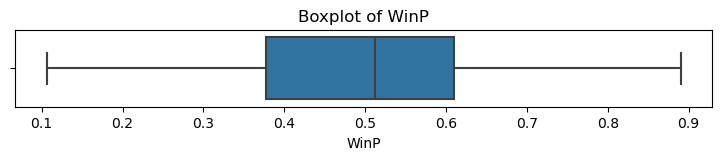

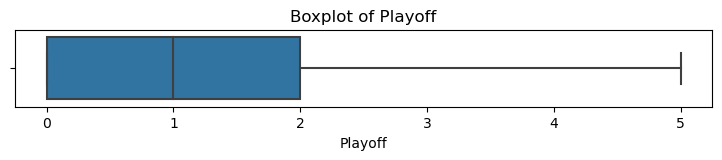

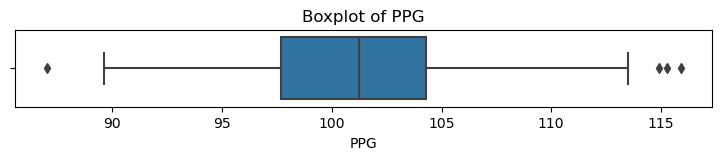

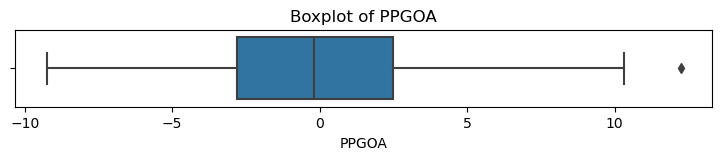

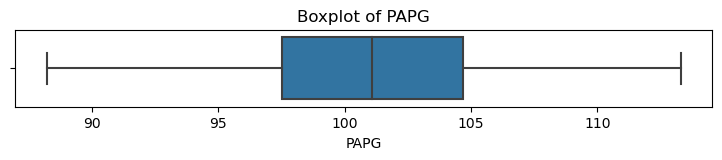

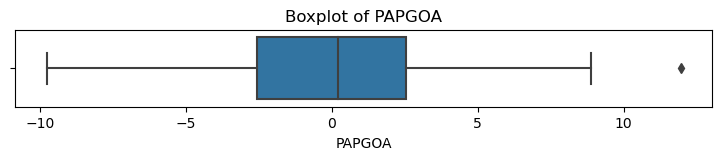

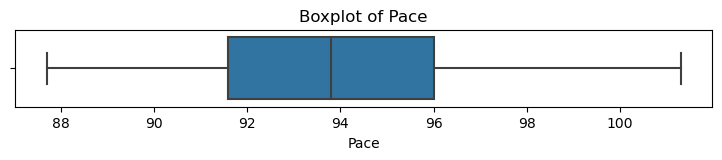

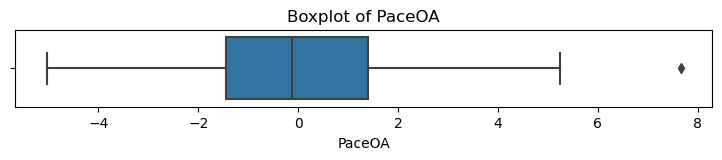

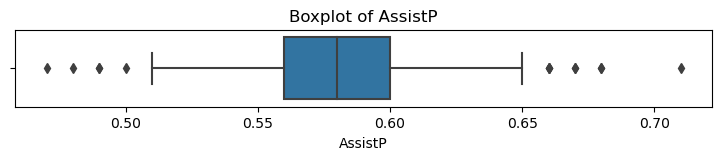

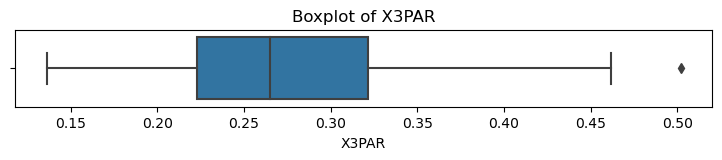

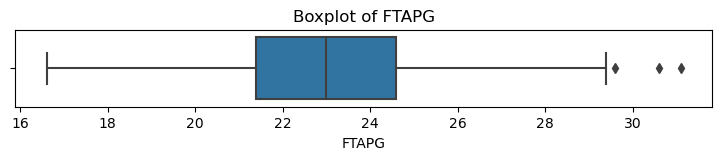

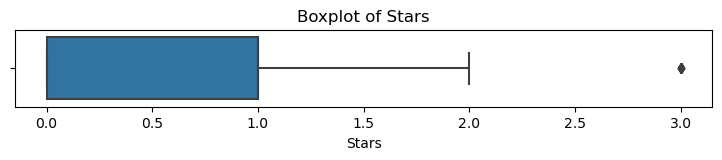

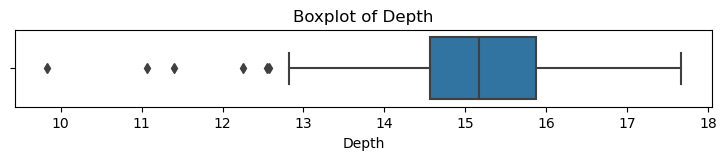

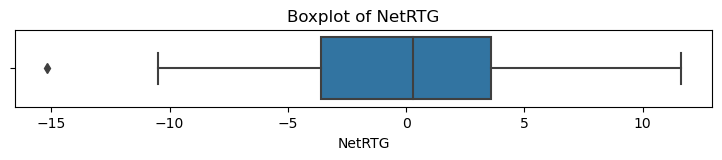

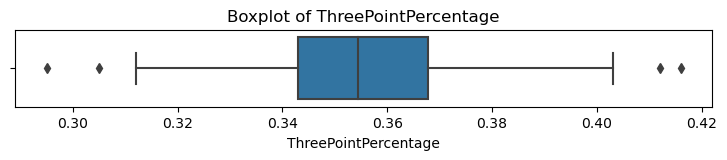

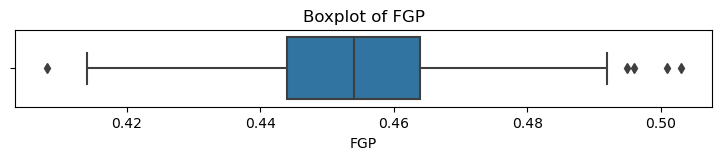

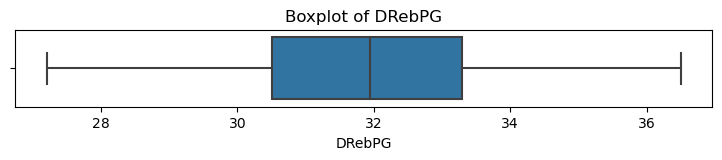

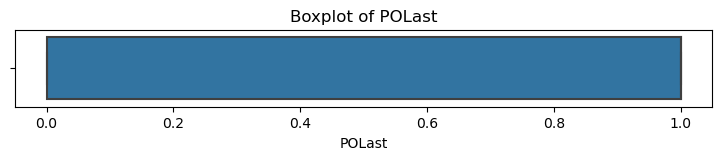

In [263]:
# Boxplots for all numerical features to identify outliers and view feature distribution
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(9, 1))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

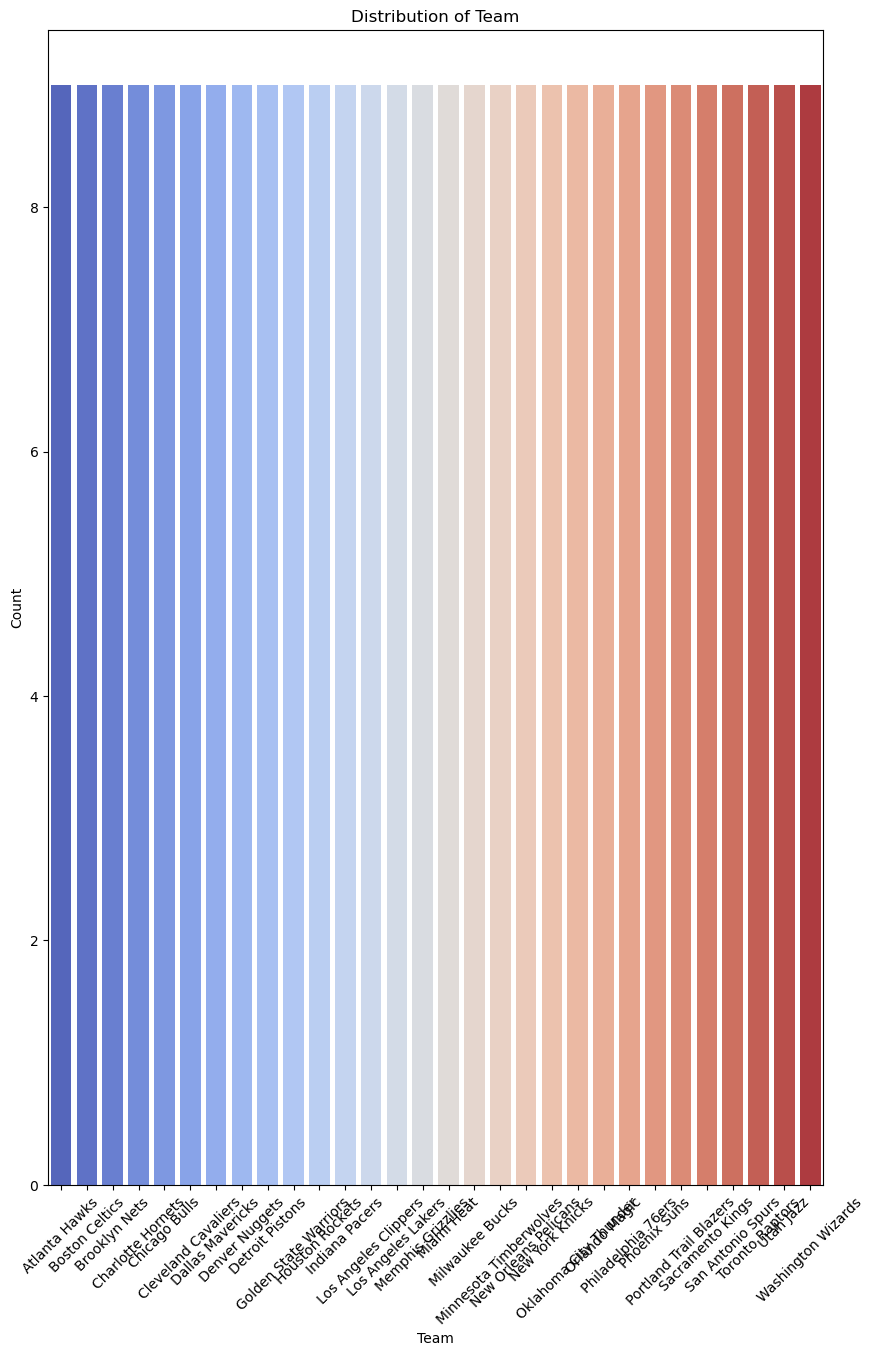

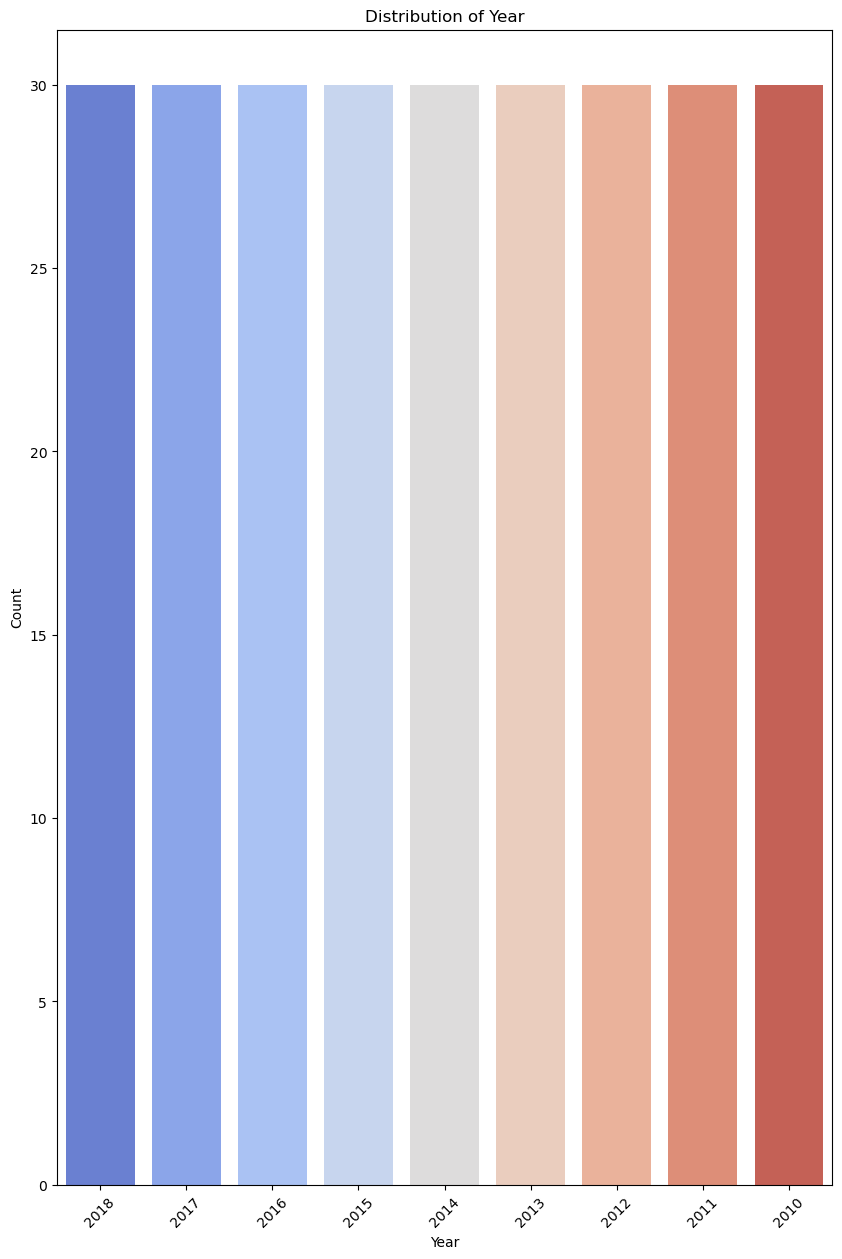

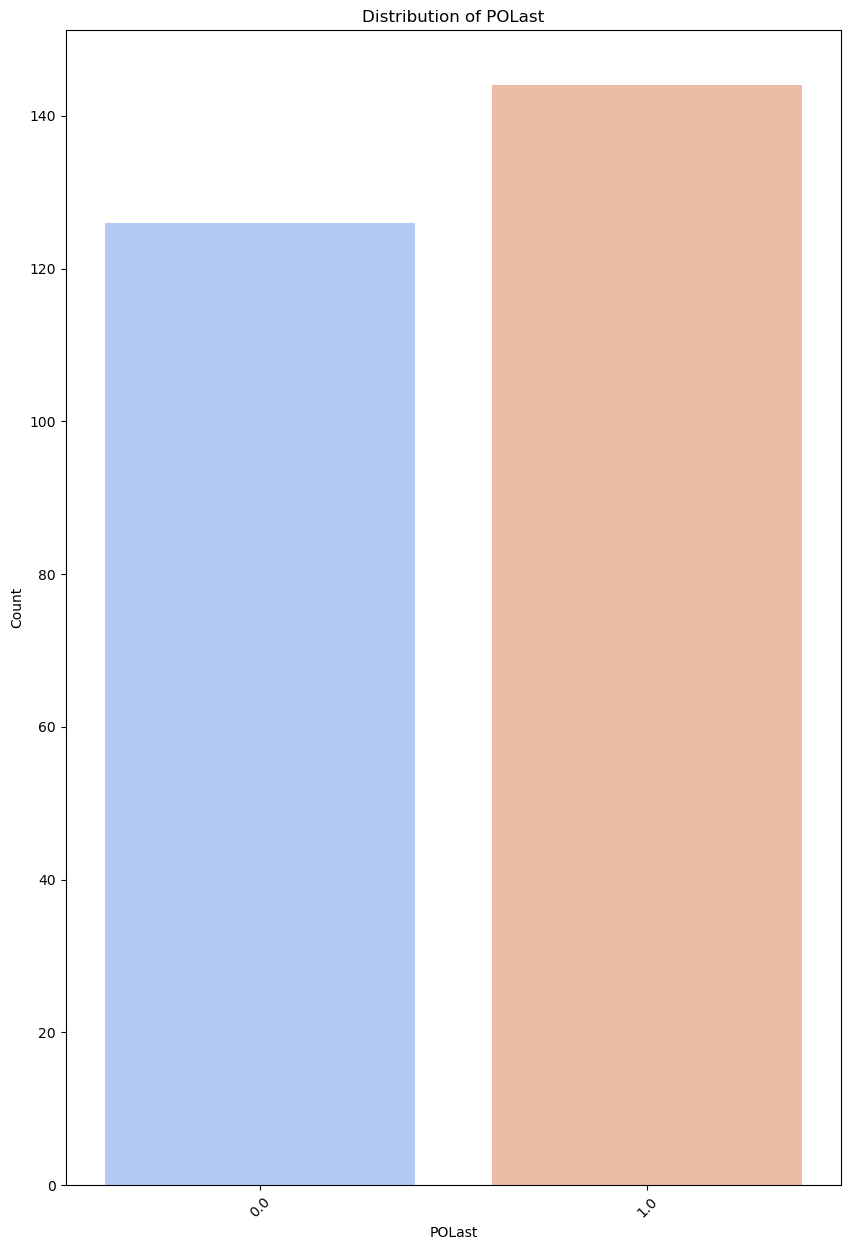

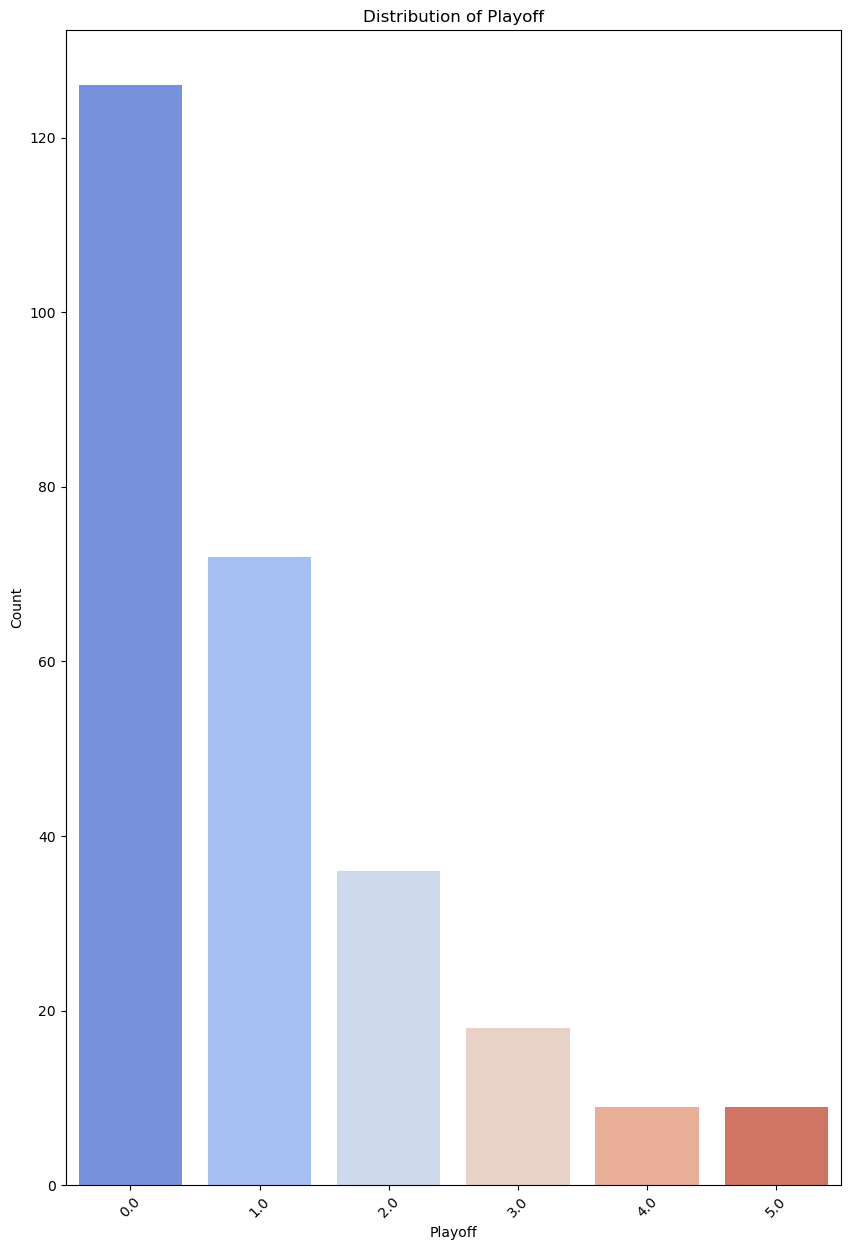

In [264]:
# non-numerical features to plot
categorical_features = ['Team', 'Year', 'POLast', 'Playoff']

# Bar plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 10))
    sns.countplot(x=feature, data=data, palette='coolwarm')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

In [265]:
# Distribution appear correct and as expected.

## Addressing Outliers 
After reviewing the outliers identified in the boxplot visualizations, it has been determined that these outliers are legitimate and relevant data points. They do not pose a significant negative impact on the k-means clustering analysis. Therefore, we have decided to retain these data points in our dataset for the clustering process.

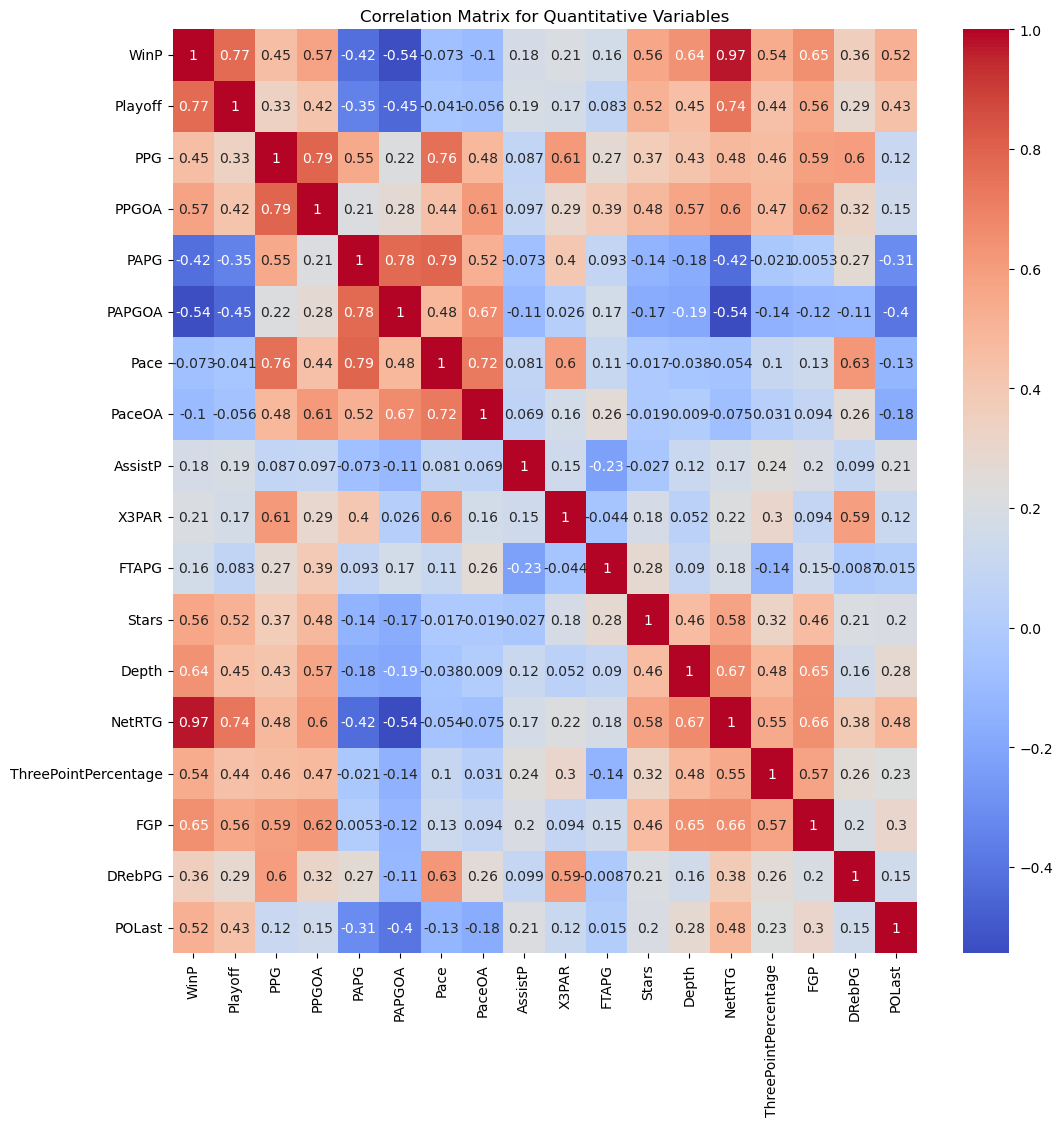

In [266]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation = numerical_data.corr()

# heatmap
plt.figure(figsize=(12, 12)) 
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Quantitative Variables')
plt.show()

In [267]:
# Correlation matrix
correlation

,WinP,Playoff,PPG,PPGOA,PAPG,PAPGOA,Pace,PaceOA,AssistP,X3PAR,FTAPG,Stars,Depth,NetRTG,ThreePointPercentage,FGP,DRebPG,POLast
WinP,1.000000,0.773584,0.452871,0.573740,-0.420198,-0.538248,-0.073208,-0.101506,0.179109,0.208508,0.163140,0.564933,0.641244,0.969924,0.540946,0.651462,0.359252,0.522682
Playoff,0.773584,1.000000,0.334960,0.424491,-0.349132,-0.447063,-0.040719,-0.056331,0.187650,0.168356,0.082653,0.516926,0.445723,0.737881,0.439661,0.558980,0.286132,0.434016
PPG,0.452871,0.334960,1.000000,0.789085,0.553247,0.217129,0.757527,0.483957,0.086781,0.608100,0.270793,0.371482,0.426552,0.475825,0.462216,0.586012,0.599634,0.117473
PPGOA,0.573740,0.424491,0.789085,1.000000,0.214891,0.275167,0.443404,0.613414,0.097291,0.292748,0.388487,0.476037,0.569678,0.601962,0.471069,0.618407,0.317993,0.148872
PAPG,-0.420198,-0.349132,0.553247,0.214891,1.000000,0.780946,0.791592,0.521550,-0.072826,0.403814,0.093046,-0.139298,-0.175378,-0.424295,-0.021213,0.005310,0.267376,-0.309396
PAPGOA,-0.538248,-0.447063,0.217129,0.275167,0.780946,1.000000,0.482822,0.667947,-0.106164,0.025913,0.165480,-0.172964,-0.194427,-0.544383,-0.144882,-0.120769,-0.111730,-0.396181
Pace,-0.073208,-0.040719,0.757527,0.443404,0.791592,0.482822,1.000000,0.722776,0.080740,0.601476,0.109138,-0.017311,-0.038500,-0.054058,0.104170,0.131478,0.625781,-0.127230
PaceOA,-0.101506,-0.056331,0.483957,0.613414,0.521550,0.667947,0.722776,1.000000,0.068616,0.163311,0.258449,-0.018646,0.008995,-0.075335,0.031026,0.093729,0.256636,-0.176013
AssistP,0.179109,0.187650,0.086781,0.097291,-0.072826,-0.106164,0.080740,0.068616,1.000000,0.145855,-0.229683,-0.026977,0.120503,0.168364,0.236872,0.198651,0.099406,0.213244
X3PAR,0.208508,0.168356,0.608100,0.292748,0.403814,0.025913,0.601476,0.163311,0.145855,1.000000,-0.044005,0.176639,0.052321,0.218750,0.301443,0.093966,0.592439,0.121874


# Feature Engineering

In [268]:
# Feature Selection
columns_to_drop = ['PaceOA', 'PAPGOA', 'PPGOA', 'WinP', 'Pace', 'Depth', 'Year', 'Team']

# Dropping columns from the DataFrame
data1 = data.drop(columns=columns_to_drop)

# Remaining columns in the DataFrame
print(data1.columns)



Index(['Playoff', 'PPG', 'PAPG', 'AssistP', 'X3PAR', 'FTAPG', 'Stars',
       'NetRTG', 'ThreePointPercentage', 'FGP', 'DRebPG', 'POLast'],
      dtype='object')


Features exhibiting high correlation, which could introduce redundancy, along with variables deemed irrelevant, have been excluded to ensure the robustness and accuracy of the analysis.

In [269]:
# heatmap
#correlation1=data1.corr()
#plt.figure(figsize=(12, 12)) 
#sns.heatmap(correlation1, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix for Quantitative Variables')
#plt.show()

In [270]:
# Encoding 'POLast'
# 'POLast' is already in binary format with values 0 and 1
print(data1['POLast'].unique())  # Verify that the values are correctly set to 0 and 1

# No encoding needed as 'POLast' has been correctly entered in binary format


[1. 0.]


In [271]:
# Scaling 'Playoff' variable
# Initialize Min-Max Scaler
minmax_scaler = MinMaxScaler()

# 'Playoff' needs scaling
print(data1['Playoff'].unique())  # Values before scaling

# Apply Min-Max scaling to 'Playoff' in data1 to maintain its ordinal nature
data1['Playoff'] = minmax_scaler.fit_transform(data1[['Playoff']])

[0. 3. 4. 5. 1. 2.]


In [272]:
# Feature Scaling numeric features
# Select columns to scale
columns_to_scale = ['PPG', 'PAPG', 'AssistP', 'X3PAR', 'FTAPG', 'Stars',
                    'NetRTG', 'ThreePointPercentage', 'FGP', 'DRebPG']

# Extract the columns into a new DataFrame for scaling
data_to_scale = data1[columns_to_scale]

# Selcting scaling method
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_to_scale)

# Replace the original columns with scaled values
data1[columns_to_scale] = scaled_data

# Confirm the scaling
#print(data1.head())


In [141]:
#Dimensionality Reduction using PCA

scaled_features = ['Playoff', 'PPG', 'PAPG', 'AssistP', 'X3PAR', 'FTAPG', 'Stars',
                   'NetRTG', 'ThreePointPercentage', 'FGP', 'DRebPG']

# Retain the components to explain 95% of the variance
pca = PCA(n_components=0.95)

pca_data = pca.fit_transform(data1[scaled_features])

# Shape of the output to see how many components were retained
print("Original number of features:", len(scaled_features))
print("Reduced number of features:", pca_data.shape[1])


Original number of features: 11
Reduced number of features: 7


In [273]:
# Convert PCA output to a DataFrame
pca_columns = ['PCA_Component_' + str(i+1) for i in range(pca_data.shape[1])]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Concatenate with the non-scaled features
# Ensure that 'data1' still contains non-scaled features we want to retain
data1_pca = pd.concat([data1.drop(columns=scaled_features), pca_df], axis=1)

# verify
print(data1_pca.head())


   POLast  PCA_Component_1  PCA_Component_2  PCA_Component_3  PCA_Component_4  \
0     1.0        -0.074686         2.510067        -2.125597         0.572765   
1     1.0        -1.801280         0.662910        -1.091448        -1.583903   
2     0.0        -0.649461         3.652970         0.309594        -1.078887   
3     0.0        -1.628505         2.181536         0.382050         0.264555   
4     1.0         0.180140         3.242828        -2.278762        -0.307453   

   PCA_Component_5  PCA_Component_6  PCA_Component_7  
0         0.455962         0.475578        -0.230874  
1        -0.814834        -0.219358        -0.257490  
2        -1.120674        -0.483695        -0.583320  
3         0.962349        -1.409834        -0.688405  
4         0.344861         0.253189         0.433790  


In [274]:
print("Explained variance by each component: ", pca.explained_variance_ratio_)
print("Total variance explained: {:.2%}".format(sum(pca.explained_variance_ratio_)))


Explained variance by each component:  [0.36158466 0.19385564 0.14377873 0.08652027 0.07233555 0.05108287
 0.04243308]
Total variance explained: 95.16%


In the feature engineering phase of the analysis, I conducted several strategic techniques to refine the dataset. Initially, I performed feature selection to eliminate highly correlated variables and those deemed irrelevant, streamlining the data for more effective clustering, avoiding overfitting. I verified and  existing binary encoding for 'POLast' feature. For numerical variables, I applied Min-Max scaling to maintain their ordinal nature and used the Standard Scaler to normalize the other variables, ensuring consistent scale across all features. Lastly, I utilized Principal Component Analysis (PCA) to reduce dimensionality, concentrating on the most significant data aspects to enhance the clustering process.

## Identifying optimal clusters 'k'

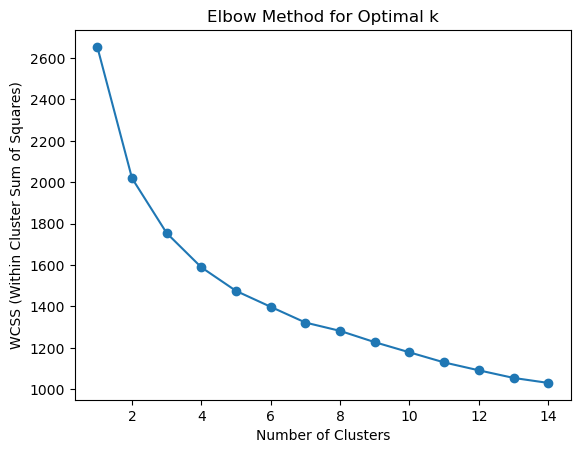

In [275]:
# Using data1_pca for elbow method to find optimal k
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=31)
    kmeans.fit(data1_pca)  # Fit to your PCA DataFrame
    wcss.append(kmeans.inertia_)

# Plotting the results to find the elbow
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()


In [276]:
# List to store the silhouette scores
silhouette_scores = []

# Loop over possible values of k from 2 to 25
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=31)
    kmeans.fit(data1_pca)
    score = silhouette_score(data1_pca, kmeans.labels_)
    silhouette_scores.append(score)
    print("For k={}, Silhouette Score = {:.3f}".format(k, score))


For k=2, Silhouette Score = 0.206
For k=3, Silhouette Score = 0.175
For k=4, Silhouette Score = 0.153
For k=5, Silhouette Score = 0.152
For k=6, Silhouette Score = 0.139
For k=7, Silhouette Score = 0.145
For k=8, Silhouette Score = 0.132
For k=9, Silhouette Score = 0.132
For k=10, Silhouette Score = 0.132


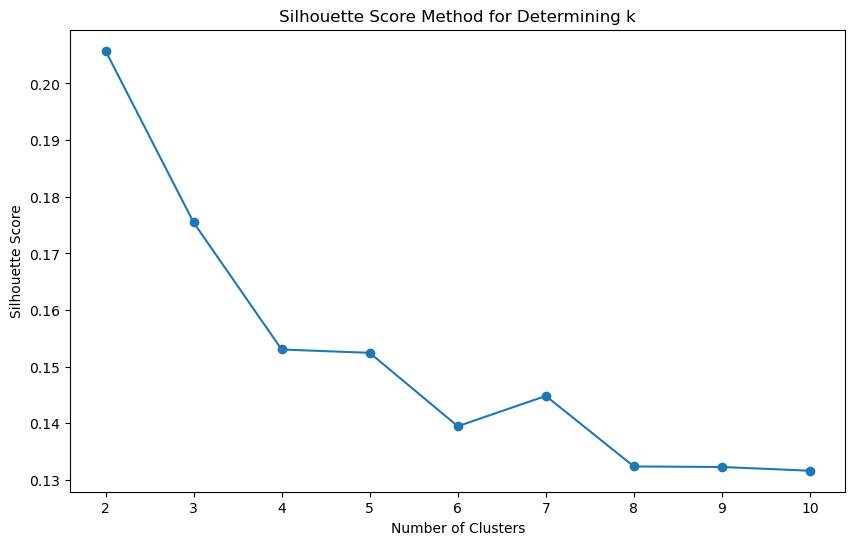

In [277]:
import matplotlib.pyplot as plt

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method for Determining k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


## Fitting the model and predicting clusters with k-means

To determine the optimal number of clusters (k=5), I used the elbow method and silhouette scores. The elbow method showed a significant plateau at k=5, indicating a good balance in reducing cluster variance. Silhouette scores were relatively higher at k=5 (0.152), suggesting decent cluster cohesion and separation at this level before declining with higher values of k. Overall the silhouette scores were moderatly low.

These analyses collectively supported the selection of k=5 as an effective number of clusters for my task.



In [278]:
# Using k = 5 for k-means clustering based on elbow and silhouette methods
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=31)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(data1_pca)

# add cluster labels back to the DataFrame to analyze the characteristics of each cluster
data1_pca['Cluster'] = clusters


## Model Evaluation

In [279]:
distances = euclidean_distances(data1_pca)

# Calculate the Dunn Index
d_index = dunn(distances, clusters)
print("Dunn Index:", d_index)

Dunn Index: 0.24459209744303462


The Dunn Index, which ranges from 0 (poor separation) to 1 (excellent separation), is used to measure the distinctiveness of clusters by comparing the minimal inter-cluster euclidean distances to the maximal intra-cluster diameters. In this context, a Dunn Index of 0.2446 indicates relatively low cluster separation, suggesting that the clusters may not be very distinct or well-separated.

In [280]:
print("\nCluster distribution:")
print(data1_pca['Cluster'].value_counts())



Cluster distribution:
2    74
0    68
3    53
1    38
4    37
Name: Cluster, dtype: int64


## Visualizing clusters distributions and plots

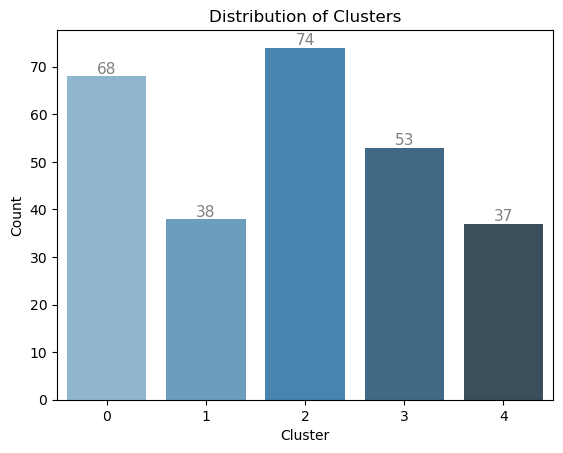

In [281]:
ax = sns.countplot(x='Cluster', data=data1_pca, palette='Blues_d')
ax.set_title('Distribution of Clusters')
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')

# Adding annotations with the count over each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='gray', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

The cluster distribution shows variation in size, with Cluster 2 being the largest at 74 instances and Cluster 4 the smallest at 37, highlighting potential differences in the dataset's subgroup characteristics or diversity.

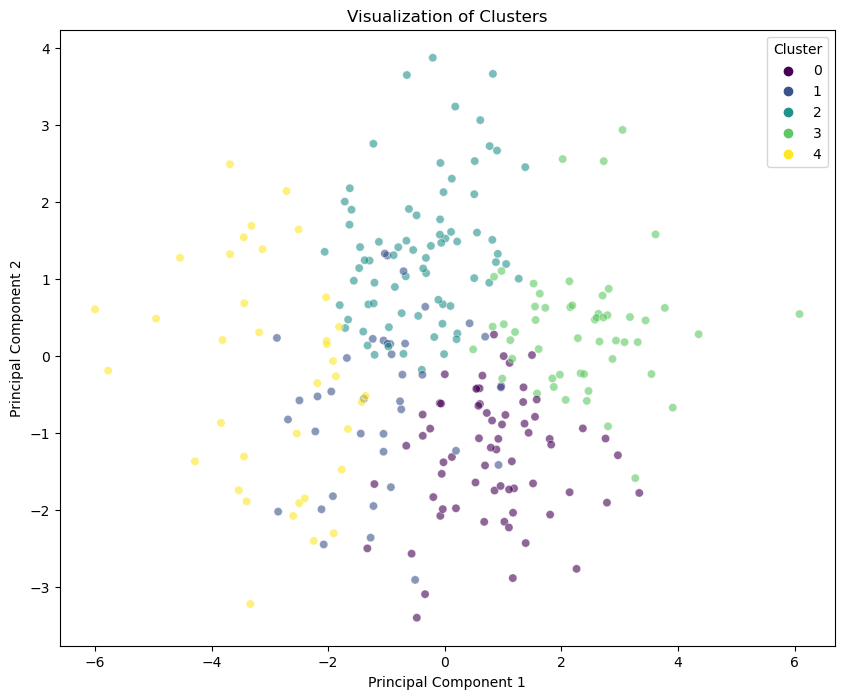

In [282]:
# Using PCA components, plotting the first two to visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_Component_1', y='PCA_Component_2', hue='Cluster', data=data1_pca, palette='viridis', legend='full', alpha=0.6)
plt.title('Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


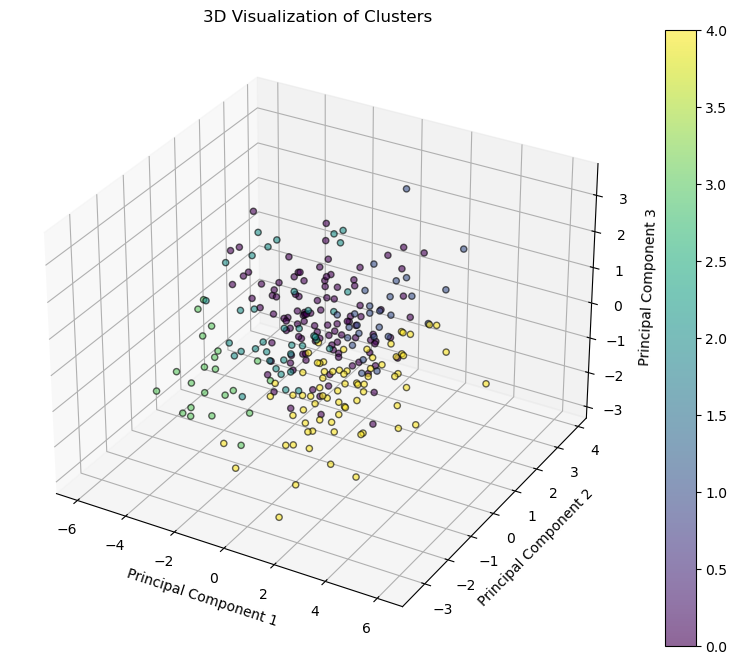

In [188]:
# Creating a new figure for 3D plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Notice the 'projection' argument here

# Scatter plot for the first three PCA components
scatter = ax.scatter(data1_pca['PCA_Component_1'], data1_pca['PCA_Component_2'], data1_pca['PCA_Component_3'],
                     c=data1_pca['Cluster'], cmap='viridis', edgecolor='k', alpha=0.6)

# Adding titles and labels
ax.set_title('3D Visualization of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Adding a color bar to show the cluster colors
plt.colorbar(scatter)

# Show the plot
plt.show()


The plots clustering show some overlapping. This is expected with the dataset as small as the one used and the unpredictable nature of basketball. Overall there can be some improvements made

In [284]:
# features used to fit the scaler
print("Features used for scaling:", scaled_features)  # This should match the PCA input

# Checking PCA and scaling dimensions alignment
print("Original number of features fitted in scaler:", scaler.scale_.shape)
print("Number of PCA components generated:", pca.n_components_)
print("Shape of PCA inverse transformed data:", centroids_pca_inversed.shape)

Features used for scaling: ['Playoff', 'PPG', 'PAPG', 'AssistP', 'X3PAR', 'FTAPG', 'Stars', 'NetRTG', 'ThreePointPercentage', 'FGP', 'DRebPG']
Original number of features fitted in scaler: (10,)
Number of PCA components generated: 7
Shape of PCA inverse transformed data: (5, 11)


# Ongoing Analysis and Alignment Challenges
 
There is a discrepancy between the features used for scaling and the dimensions of the PCA inverse-transformed data. Specifically, the scaler was initially fitted with 10 features, while PCA and the inverse transformation were applied to 11 features, leading to a mismatch that complicates the process of reverting the data to its original scale. The goal is to correctly align these transformations so that we can effectively revert the PCA-transformed centroids back to the original feature space. This enables detailed analysis of the clusters to search for patterns and address the formulated research questions. By analyzing the means of the centroids, stakeholders such as coaches or bettors might be able to identify patterns that indicate successful strategies, providing valuable insights for decision-making in coaching tactics or betting strategies.

# References

Basketball Statistics & History of every Team & NBA and WNBA players. Basketball. (n.d.). https://www.basketball-reference.com/ 